Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68



Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


<ipython-input-4-64842277d9a8>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


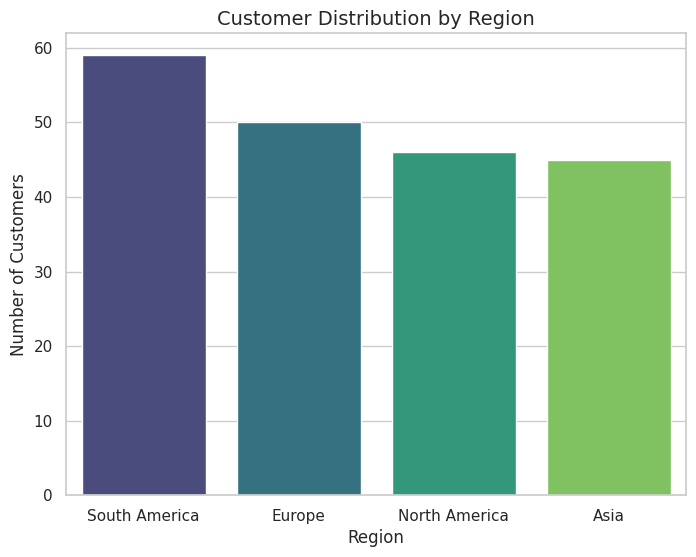

<ipython-input-4-64842277d9a8>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="plasma")


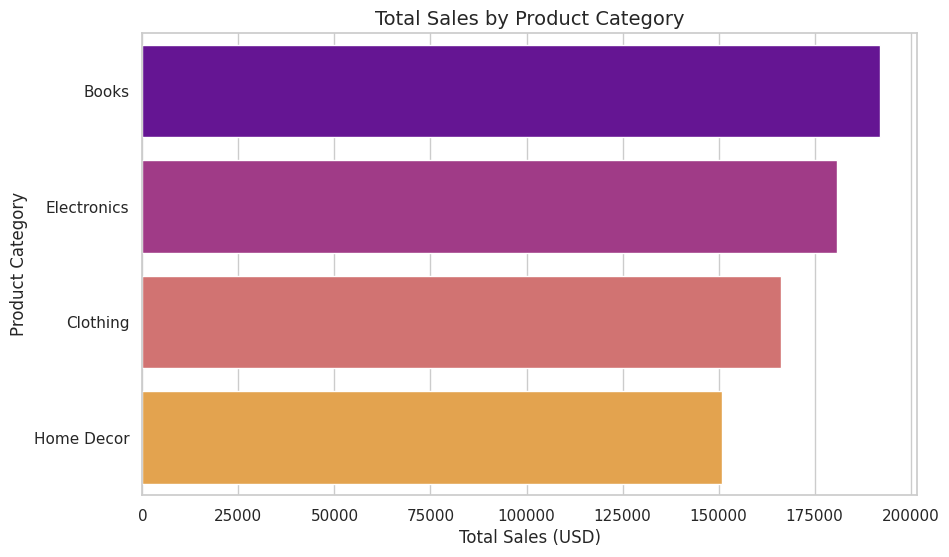

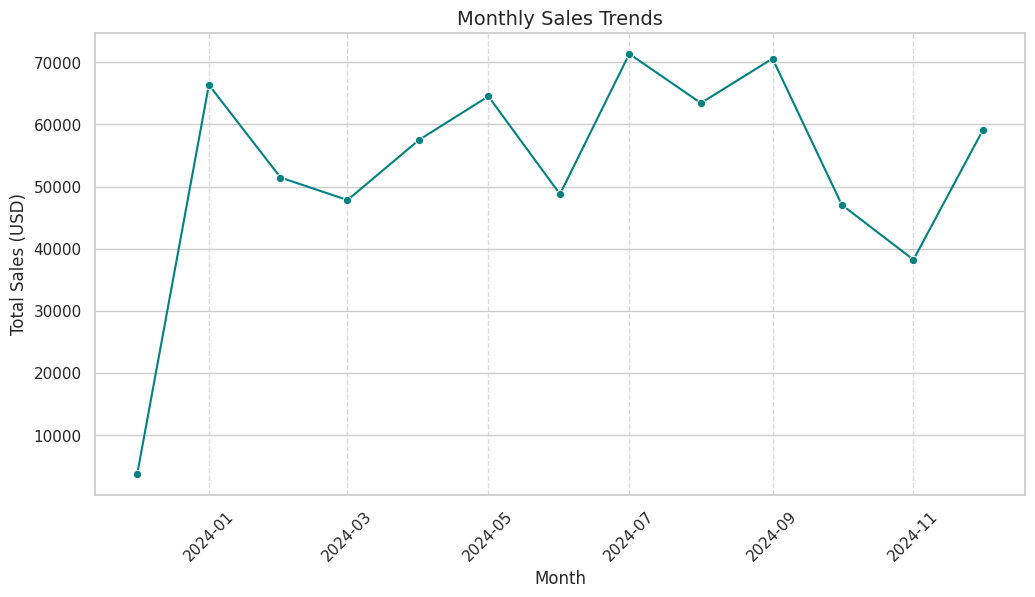

<ipython-input-4-64842277d9a8>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers['TotalValue'], y=top_customers['CustomerName'], palette="coolwarm")


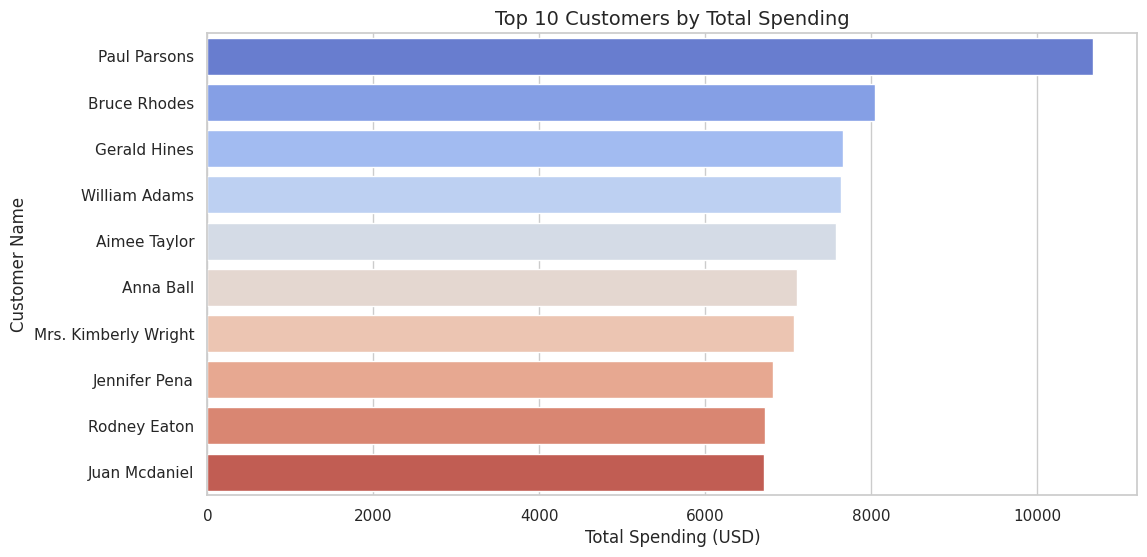

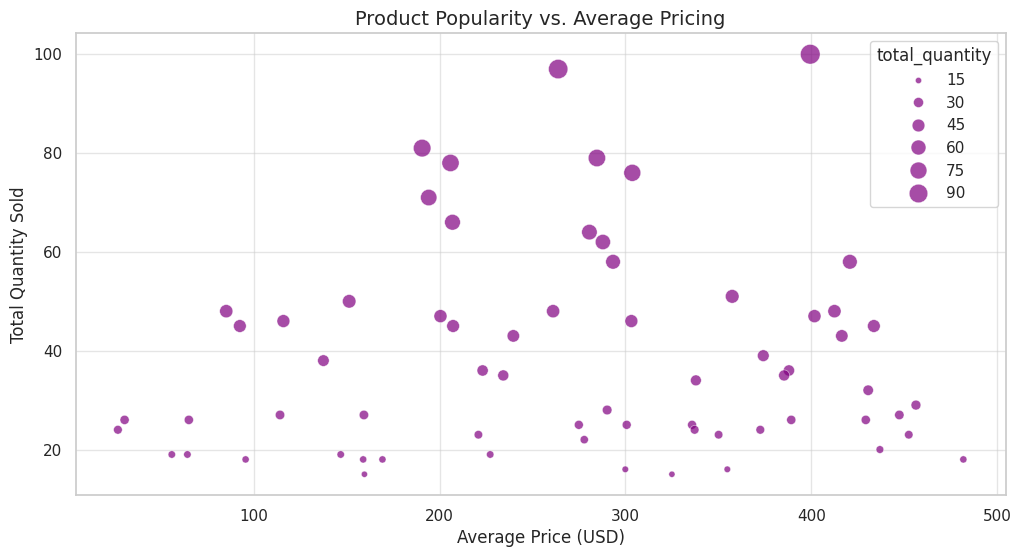


### Business Insights
1. South America has the highest number of customers, representing a key market for focused promotions.
2. Electronics and Books are the top-performing categories by sales.
3. Monthly sales show seasonal spikes, indicating opportunities for targeted campaigns.
4. A small percentage of customers contribute to a significant portion of revenue (e.g., top 10 customers).
5. Lower-priced products sell in higher quantities, suggesting price sensitivity in certain segments.

### Conclusion
The EDA reveals actionable insights into customer behavior, product performance, and sales trends.


In [4]:
# Exploratory Data Analysis (EDA)

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme for visualizations
sns.set_theme(style="whitegrid")

# 2. Load the Data
# File paths
customers_path = "Customers.csv"
products_path = "Products.csv"
transactions_path = "Transactions.csv"

# Read datasets
customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

# Preview datasets
print("Customers Dataset:")
display(customers_df.head())

print("Products Dataset:")
display(products_df.head())

print("Transactions Dataset:")
display(transactions_df.head())

# 3. Data Cleaning
# Check for missing values
print("\nMissing Values:")
print("Customers:", customers_df.isnull().sum())
print("Products:", products_df.isnull().sum())
print("Transactions:", transactions_df.isnull().sum())

# Convert dates to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# 4. Exploratory Analysis
# 4.1 Customer Distribution by Region
region_counts = customers_df['Region'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

# 4.2 Top Product Categories by Sales
# Merge Transactions and Products datasets
transactions_products = pd.merge(transactions_df, products_df, on="ProductID")
category_sales = transactions_products.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="plasma")
plt.title("Total Sales by Product Category", fontsize=14)
plt.xlabel("Total Sales (USD)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.show()

# 4.3 Monthly Sales Trends
transactions_time = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
transactions_time.index = transactions_time.index.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x=transactions_time.index, y=transactions_time.values, marker='o', color="teal")
plt.title("Monthly Sales Trends", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4.4 Top 10 Customers by Spending
customer_sales = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers = pd.merge(customer_sales.reset_index(), customers_df[['CustomerID', 'CustomerName']], on='CustomerID')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers['TotalValue'], y=top_customers['CustomerName'], palette="coolwarm")
plt.title("Top 10 Customers by Total Spending", fontsize=14)
plt.xlabel("Total Spending (USD)", fontsize=12)
plt.ylabel("Customer Name", fontsize=12)
plt.show()

# 4.5 Product Pricing vs. Popularity
product_sales = transactions_products.groupby('ProductName').agg(
    total_quantity=('Quantity', 'sum'),
    average_price=('Price_y', 'mean')  # Adjusted to use Price_y
).sort_values(by='total_quantity', ascending=False)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=product_sales['average_price'],
    y=product_sales['total_quantity'],
    size=product_sales['total_quantity'],
    sizes=(20, 200),
    color="purple",
    alpha=0.7
)
plt.title("Product Popularity vs. Average Pricing", fontsize=14)
plt.xlabel("Average Price (USD)", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.grid(alpha=0.5)
plt.show()


# 5. Insights
print("\n### Business Insights")
print("1. South America has the highest number of customers, representing a key market for focused promotions.")
print("2. Electronics and Books are the top-performing categories by sales.")
print("3. Monthly sales show seasonal spikes, indicating opportunities for targeted campaigns.")
print("4. A small percentage of customers contribute to a significant portion of revenue (e.g., top 10 customers).")
print("5. Lower-priced products sell in higher quantities, suggesting price sensitivity in certain segments.")

# 6. Conclusion
print("\n### Conclusion")
print("The EDA reveals actionable insights into customer behavior, product performance, and sales trends.")
